

# Project: Investigate a Dataset with No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The No-Show Appointments dataset is a collection of medical appointment records in Brazil, where each entry represents an individual appointment. The dataset encompasses 110,527 appointments, each detailed with associated patient information and appointment characteristics. The primary focus of this dataset is to explore factors that might influence whether a patient misses their appointment.

Each record in the dataset is uniquely identified by a PatientId and an AppointmentID. Additional demographic information is provided, such as Gender, along with temporal data including ScheduledDay (the day the patient set up their appointment) and AppointmentDay (the day of the actual medical appointment). The Age of the patient is also included, offering insights into how age demographics might affect appointment adherence.



Certainly, analyzing the relationships between multiple variables, especially with a clear dependent variable like 'No-show', can provide valuable insights. Here are some research questions that examine the relationships between 'No-show' and multiple independent variables from the dataset:

### Relationship Between Health Conditions and No-Show Rates:

How does the presence of hypertension affect appointment attendance behavior in patients?

### Socioeconomic Factors and No-Show Rates:

How does the presence of a scholarship impact patient attendance for scheduled appointments?

### Geographic and Temporal Factors:

What are the top 20 neighborhoods with the highest rate of no-show appointments? 

With this information, we can pose several analytical questions, such as:

Are certain neighbourhoods associated with higher no-show rates?
Does the distance between the patient's home neighbourhood and the appointment's location affect their likelihood of attending?
Are there any particular health conditions that are more prevalent in specific neighbourhoods?


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [66]:
# getting the first few line of data
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
# this will give us how the data looks towards the end.
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
df.shape

(110527, 14)

### Shape:
By looking at the shape of the data, we found out there are 110527 rows and 14 columns.

In [12]:
#getting the bird eye view of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
#type of data in each of the column.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

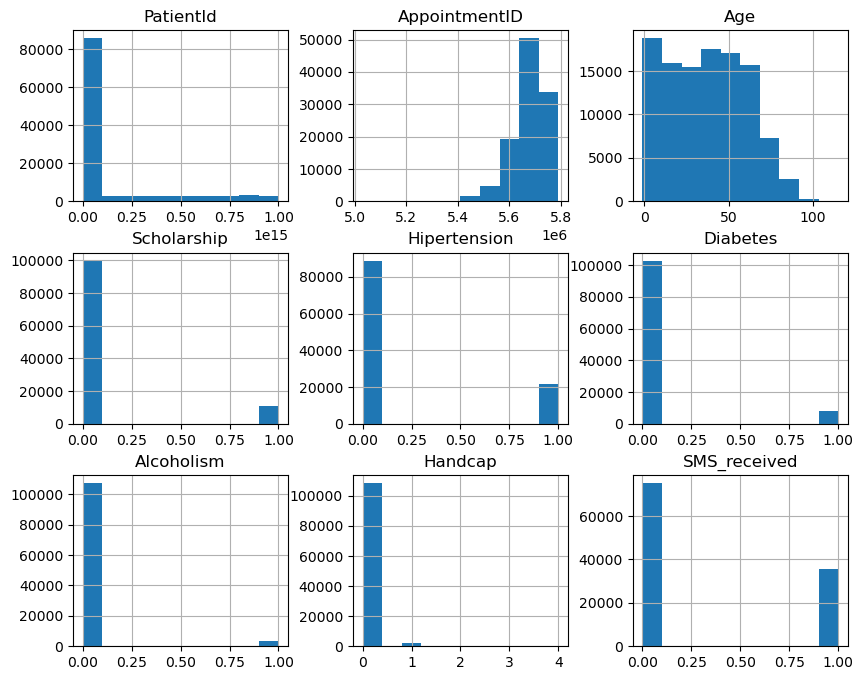

In [14]:
# by getting the histogram of the data, we are taking overall picture of the data, how the data looks like.
df.hist(figsize=(10,8));

Here's an interpretation of what each histogram may indicate about the data:

### Age:
This histogram likely shows the age distribution of the individuals in the dataset. It appears to be right-skewed, meaning there are more younger individuals than older ones. There's a concentration of data points in the lower age range, which then tapers off as age increases.

### Scholarship: 
This binary variable appears to show that a smaller number of individuals are enrolled in the Bolsa Família scholarship program (indicated by the value 1) compared to those who are not (indicated by the value 0).

### Hypertension: 
The histogram for hypertension suggests that a larger portion of the dataset does not have hypertension (value 0) compared to those who do (value 1).

### Diabetes: 
Similar to hypertension, a larger number of individuals do not have diabetes (value 0) than those who do (value 1). The number of patients with diabetes is relatively small in comparison to non-diabetic patients.

### Alcoholism: 
The histogram shows that alcoholism is not common among the individuals in the dataset, with the vast majority not reporting alcoholism (value 0).

### Handicap: 
The histogram for the handicap variable indicates that the majority of individuals are not handicapped (value 0). There's a very small number of individuals with varying degrees of handicap (values 1, 2, 3, 4), with '1' being more common than higher values. The occurrence of higher handicap levels (3 and 4) is quite rare.

### SMS_received: 
This histogram shows that a considerable number of individuals did receive an SMS (value 1) but it's still less than the number of individuals who did not receive an SMS (value 0).

In [15]:
# by getting the type of the data, we are trying find the exact type of the data in Gender column.
type(df.Gender[0])

str

In [16]:
#the exact data type for ScheduledDay is string, we are looking to have this data in date time format.
type(df.ScheduledDay[0])

str

In [17]:
# same thing finding the format of the data, so we can change the format in further exploration
type(df.AppointmentDay[0])

str

In [18]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The descibe funciton gives us descriptive Statistics that summarize the data.
#### PatientId and AppointmentID: 
These columns seem to be identifiers for patients and appointments.
#### Age:
The 'count' tells us there are 110,527 entries.
The 'mean' age is approximately 37 years.
The 'std' (standard deviation) is about 23, indicating there's a wide range of ages.
#### Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received:
These seem to be binary or categorical variables where a 1 represents a 'Yes' or the presence of a condition (or receipt of an SMS), and 0 represents a 'No' or absence.
For binary data like this, 'mean' represents the proportion of '1' entries. For example, approximately 9.8% of the dataset has a scholarship, 19.7% have hypertension, 7.1% have diabetes, 3% have alcoholism, and 32% received SMS messages.
The 'std' describes the variability of these binary values; higher values indicate more variability.
#### Handicap:
 The 'max' value of 4 suggests this is not a binary variable like the others but rather categorical with potentially 5 levels (0 to 4).

In [19]:
# trying to find, what kind of data is in this column. by looking at the result it looks, 0 presents having the 
# scholarship and 1 persents not having the scholarship.
df.Scholarship.unique()

array([0, 1])

In [20]:
# looking for kind of data in column, results indicate we have 1 as yes and 0 as no.
df.Hipertension.unique()

array([1, 0])

In [21]:
#by looking at the variable type we can assume, there are people with Daibetes and people without it.
df.Diabetes.unique()

array([0, 1])

### Handcap column:
The 'handcap' column in our dataset has five unique values (0, 1, 2, 3, 4), it likely represents a categorical variable indicating the level of disability or handicap where 0 would represent no handicap and 1, 2, 3, 4 represent increasing levels of severity. Here is a possible interpretation of these values:

0: No handicap
1: Mild handicap
2: Moderate handicap
3: Severe handicap
4: Very severe handicap or multiple handicaps

In [22]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [23]:
df.Neighbourhood.nunique()

81

### Neighbourhood
A fundamental aspect of our dataset is the Neighbourhood variable, which represents the location of the hospital or clinic where each appointment takes place. Understanding the distribution of appointments across different neighbourhoods can provide insights into geographic trends in healthcare access or appointment adherence.

The output, which is 81, indicates that there are eighty-one unique neighbourhoods where appointments in our dataset are located. This diversity in locations allows for a broad analysis of geographical factors and their potential influence on patient no-shows and healthcare outcomes.



In [24]:
# here we are verifying that the data point  with age equal to 115 are real data points.
df[df.Age==115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [25]:
df.query('Handcap in [1,2,3,4]').count()

PatientId         2241
AppointmentID     2241
Gender            2241
ScheduledDay      2241
AppointmentDay    2241
Age               2241
Neighbourhood     2241
Scholarship       2241
Hipertension      2241
Diabetes          2241
Alcoholism        2241
Handcap           2241
SMS_received      2241
No-show           2241
dtype: int64

In the analysis of the 'handcap' variable within our dataset, we observe a significant distribution trend indicating that the majority of patients do not have a recorded handicap, as denoted by the value '0'. This categorization underscores a predominant absence of handicaps among the patient population. Furthermore, upon aggregating the data points across the remaining categories (1, 2, 3, 4), which represent varying degrees of handicap severity, we identify a collective total of 2,241 instances. This quantitative insight highlights a comparatively smaller, yet significant, segment of the patient cohort that is characterized by one or more forms of handicaps. This distribution provides a foundational understanding of the patient demographic's physical condition landscape, informing subsequent healthcare accessibility and support analyses.




### Data Cleaning 

In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [27]:
#checking how does the data looks like in these columns.
df[['ScheduledDay','AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


In [28]:
#checking for the datatypes of two columns.
type(df.ScheduledDay[0]),type(df.AppointmentDay[0])

(str, str)

In [29]:
# creating a function to change the columns to datetime
def change_to_datetime(col):
    to_datetime=pd.to_datetime(col)
    return to_datetime

In [30]:
#converting the Scheduled day into date time.
df['ScheduledDay']=df['ScheduledDay'].apply(change_to_datetime)

In [65]:
#converting the Appointment Day into date time.
df['AppointmentDay']=df['AppointmentDay'].apply(change_to_datetime)

In [33]:
# checking for any duplicates in the data, by the output we have come to know, there are no duplicates in data
sum(df.duplicated())

0

In [34]:
# the reason for drop this row is age is less than 0 as age cannot be less than zero.
indices_to_drop=df[df['Age']<0].index
df.drop(indices_to_drop,inplace=True)

In [35]:
#checking if there are any null values , there are no null values in the data set.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### droping SMS_received column:
In the course of our data preprocessing and cleaning activities, we identified that the 'SMS_received' column within our dataset indicated that no patients had received an SMS notification regarding their appointment. Given this uniform absence of SMS receipt across the dataset, the 'SMS_received' column did not hold any discriminative information that could contribute to our analysis.

Consequently, to streamline the dataset and focus our analysis on variables with informative variability, we decided to remove the 'SMS_received' column. This decision was executed using the appropriate Pandas DataFrame method to drop the column, ensuring our dataset only contains features that offer potential analytical value. The removal of this column also aids in data handling efficiency and clarity for subsequent exploratory data analysis and modeling phases.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:


## What are the top 20 neighborhoods with the highest rate of no-show appointments?

In [36]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
# we have masked the data with poeple, who did not show up for appointment.
no_show=df['No-show']=='Yes'
df[no_show].shape[0]

22319

In [38]:
# again we are finding out people, who have shown up for appointment.
show=df['No-show']=='No'
df[show].shape[0]

88207

In [39]:
# Group the DataFrame by 'Neighbourhood' and count the number of appointments in each neighborhood
biggest_neighbourhood = df.groupby('Neighbourhood').size()

# Sort the counts in descending order to identify the neighborhoods with the highest number of appointments
# and use .head(20) to select the top 20 neighborhoods from this sorted list
biggest_size_sorted = biggest_neighbourhood.sort_values(ascending=False).head(20)

# Display the sorted list of top 20 neighborhoods with the highest number of appointments
print(biggest_size_sorted)



Neighbourhood
JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2746
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
ILHA DO PRÍNCIPE     2266
NOVA PALESTINA       2264
ANDORINHAS           2262
DA PENHA             2217
ROMÃO                2214
dtype: int64


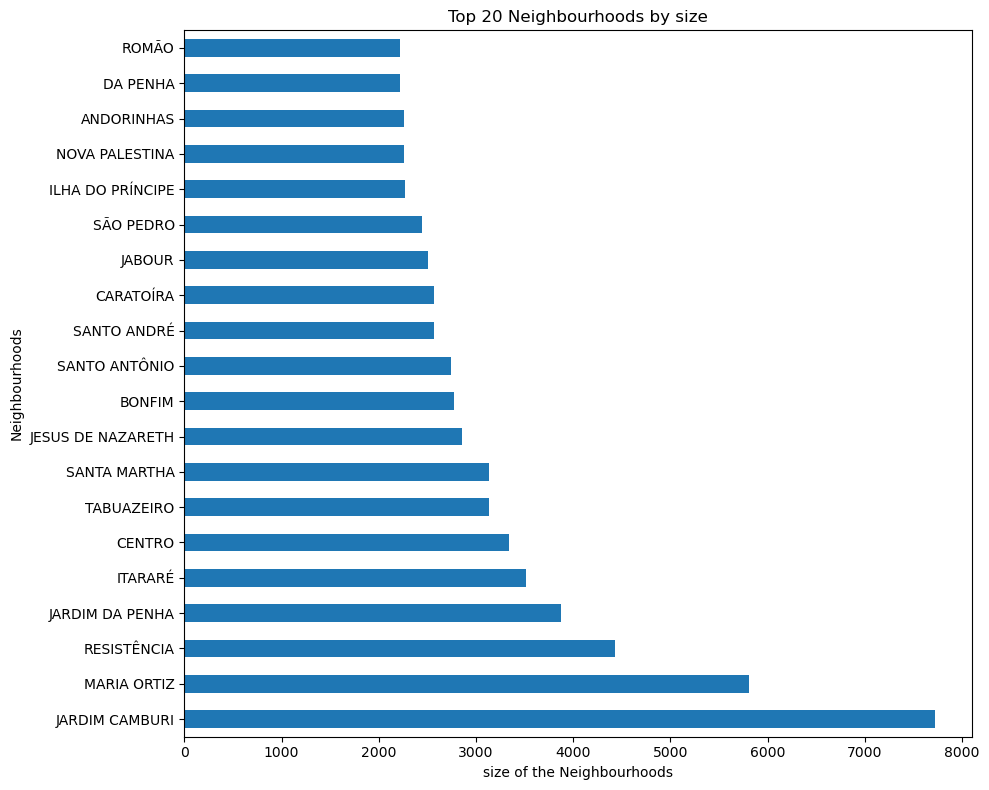

In [40]:
plt.figure(figsize=(10,8))
biggest_size_sorted.plot(kind='barh')
plt.title('Top 20 Neighbourhoods by size')
plt.xlabel('size of the Neighbourhoods')
plt.ylabel('Neighbourhoods')
plt.tight_layout()  # Adjust layout to fit all labels and title
plt.show()


In [41]:
#grouping the data with neighbourhood with no shows.
no_show_neighbourhood = df[no_show].groupby('Neighbourhood').size()
#sorting the values in descending order
top_neighbourhoods = no_show_neighbourhood.sort_values(ascending=False)
top_neighbourhoods.head(20)


Neighbourhood
JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
ILHA DO PRÍNCIPE      532
ANDORINHAS            521
SÃO PEDRO             515
SANTO ANDRÉ           508
SANTA MARTHA          496
SANTO ANTÔNIO         484
ROMÃO                 474
GURIGICA              456
JABOUR                451
DA PENHA              429
dtype: int64

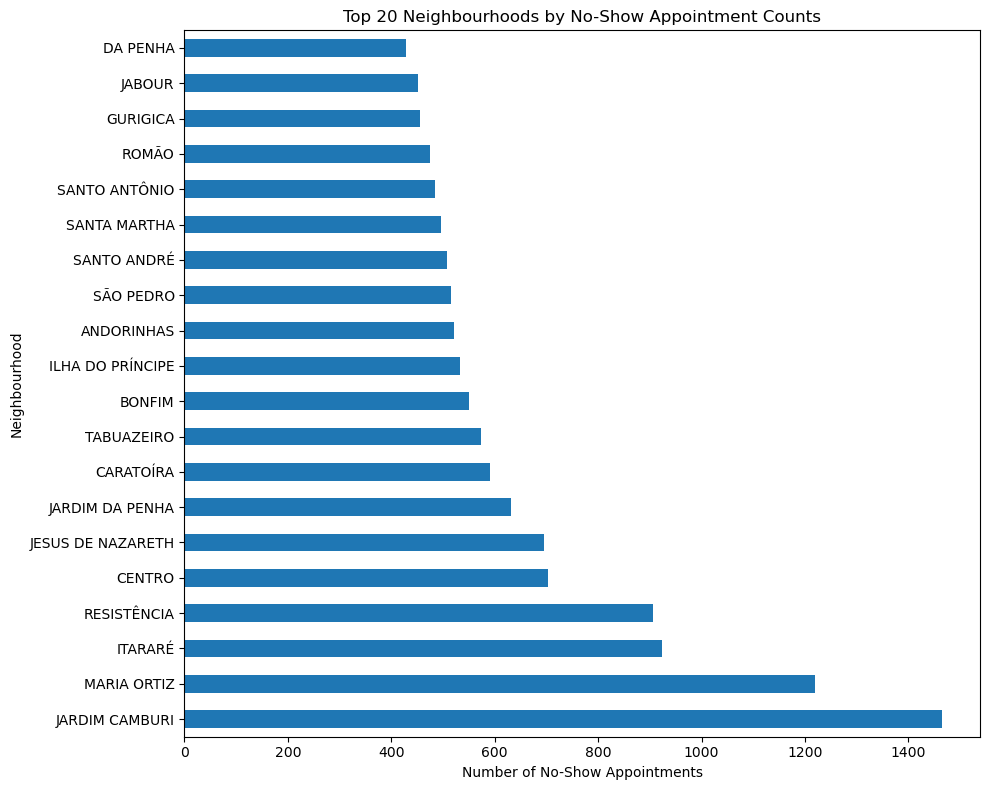

In [42]:
#grouping the data with neighbourhood with no shows.
no_show_neighbourhood = df[no_show].groupby('Neighbourhood').size()

# Sort and select top N neighbourhoods for a clearer visualization
top_neighbourhoods = no_show_neighbourhood.sort_values(ascending=False).head(20)  # Top 20 as an example

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size to your display needs
top_neighbourhoods.plot(kind='barh')  # 'barh' creates a horizontal bar chart
plt.title('Top 20 Neighbourhoods by No-Show Appointment Counts')
plt.xlabel('Number of No-Show Appointments')
plt.ylabel('Neighbourhood')
plt.tight_layout()  # Adjust layout to fit all labels and title
plt.show()


In [43]:
# Apply the 'show' mask to filter the DataFrame for patients who showed up for their appointments
# Then, group the filtered DataFrame by 'Neighbourhood' and count the number of show-up appointments in each neighborhood
showup_neighbourhood = df[show].groupby('Neighbourhood').size()

# Sort the counts of show-up appointments in descending order to identify the neighborhoods with the highest number of show-ups
# Use .head(20) to select the top 20 neighborhoods from this sorted list
top_neighbourhood_showup = showup_neighbourhood.sort_values(ascending=False).head(20)

# Display the sorted list of top 20 neighborhoods with the highest number of show-up appointments
print(top_neighbourhood_showup)


Neighbourhood
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
CENTRO               2631
ITARARÉ              2591
TABUAZEIRO           2559
SANTO ANTÔNIO        2262
BONFIM               2223
JESUS DE NAZARETH    2157
SANTO ANDRÉ          2063
JABOUR               2058
CARATOÍRA            1974
SÃO PEDRO            1933
NOVA PALESTINA       1862
DA PENHA             1788
ANDORINHAS           1741
ROMÃO                1740
ILHA DO PRÍNCIPE     1734
dtype: int64


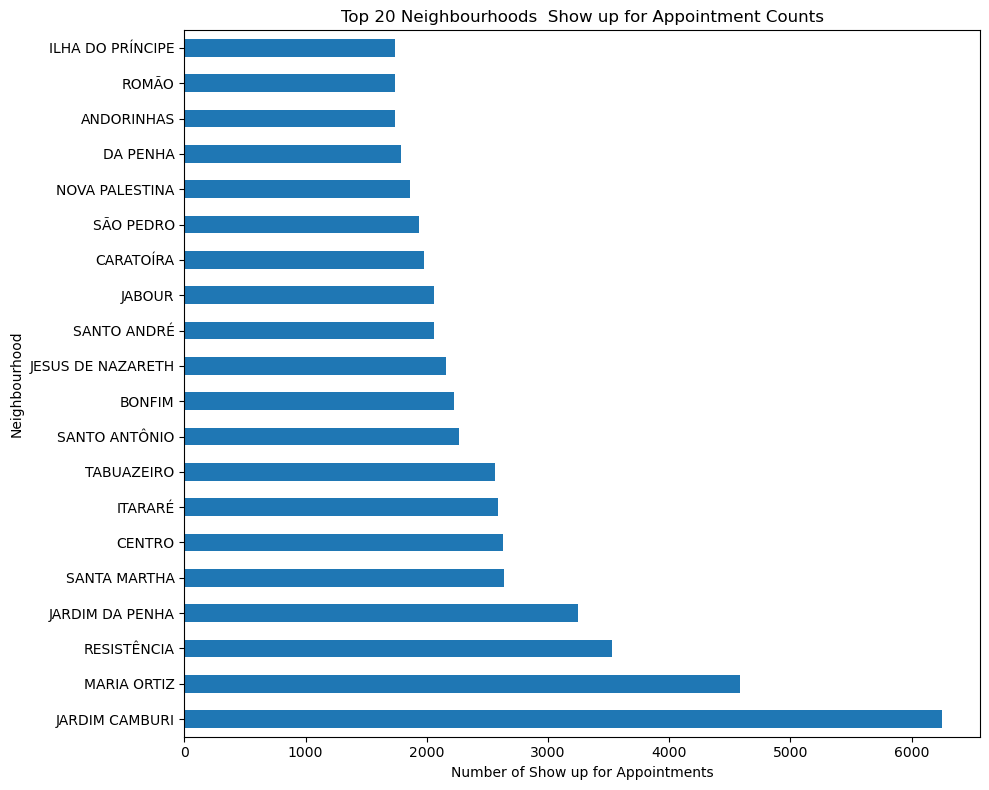

In [44]:
# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size to your display needs
top_neighbourhood_showup.plot(kind='barh')  # 'barh' creates a horizontal bar chart
plt.title('Top 20 Neighbourhoods  Show up for Appointment Counts')
plt.xlabel('Number of Show up for Appointments')
plt.ylabel('Neighbourhood')
plt.tight_layout()  # Adjust layout to fit all labels and title
plt.show()

### Observation of No-Show and Show-Up Trends in Healthcare Appointments by Neighbourhood

Upon examining the datasets reflecting healthcare appointment adherence across different neighbourhoods, several trends have been observed which could inform targeted healthcare delivery strategies.

In the dataset reflecting the size of the patient population per neighbourhood, 'JARDIM CAMBURI' stands out with the highest number of registered appointments at 7,717, followed by 'MARIA ORTIZ' with 5,805 appointments. These figures suggest that these areas may either have a higher population density or increased access to healthcare facilities, necessitating a deeper analysis into healthcare resource allocation to these zones.

Turning our attention to no-show appointments, 'JARDIM CAMBURI' again ranks highest with 1,465 no-shows, which constitutes approximately 19% of its total appointments. 'MARIA ORTIZ' follows with 1,219 no-shows, about 21% of its total appointments. It is notable that 'ITARARÉ' and 'RESISTÊNCIA' show a higher percentage of no-shows relative to their total appointments, at approximately 26% and 20% respectively, indicating a potential area for intervention to improve attendance rates.

On the contrary, when examining show-up rates, 'JARDIM CAMBURI' maintains a substantial number of attendees at 6,252, alongside 'MARIA ORTIZ' with 4,586 attendees. These figures underscore a relatively strong engagement with healthcare services within these communities. Noteworthy is the performance of 'SANTA MARTHA', which despite being lower in appointment numbers, displays a high show-up rate with 2,635 out of 3,131 appointments honored, translating to a low no-show rate of around 15.8%.

The data prompts several actionable considerations. For neighbourhoods with high no-show rates, investigating underlying causes such as transportation difficulties, economic factors, or appointment reminder system inefficiencies could be beneficial. It also opens the door to explore the efficacy of outreach and education programs tailored to these specific neighbourhoods to enhance appointment compliance.

In conclusion, the observed data indicates significant variability in no-show and show-up rates across different neighbourhoods. It is crucial for healthcare providers and policymakers to delve into these disparities, identify the driving factors behind them, and tailor community-specific interventions to enhance healthcare service utilization and optimize resource distribution.



### Research Question 2 

### How does the presence of a scholarship impact patient attendance for scheduled appointments?

In [45]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
# Create a boolean mask for people with a scholarship
has_scholarship = df['Scholarship'] == 1

# Assuming 'No-show' == 'Yes' means they did not show up, create a mask for no-shows
no_show = df['No-show'] == 'Yes'

# Apply both masks to the DataFrame to filter for people with a scholarship who did not show up
people_with_scholarship_no_show = df[has_scholarship & no_show]

# Count the number of people who meet both criteria
number_of_people_with_scholarship_no_show = people_with_scholarship_no_show.shape[0]

# Now, number_of_people_with_scholarship_no_show holds the count of people who have a scholarship and did not show up


In [47]:
number_of_people_with_scholarship_no_show

2578

In [48]:
# Create a boolean mask for people with no scholarship
no_scholarship = df['Scholarship'] == 0

# Assuming 'No-show' == 'Yes' means they did not show up, create a mask for no-shows
no_show = df['No-show'] == 'Yes'

# Apply both masks to the DataFrame to filter for people with a no scholarship who did not show up
people_no_scholarship_no_show = df[no_scholarship & no_show]

# Count the number of people who meet both criteria
number_of_people_no_scholarship_no_show = people_no_scholarship_no_show.shape[0]

# Now, number_of_people_with_scholarship_no_show holds the count of people who have no scholarship and did not show up


In [49]:
number_of_people_no_scholarship_no_show

19741

In [50]:

# Create a boolean mask for people with no scholarship
no_scholarship = df['Scholarship'] == 0

# Assuming 'No-show' == 'Yes' means they did not show up, create a mask for no-shows
show = df['No-show'] == 'No'

# Apply both masks to the DataFrame to filter for people with no scholarship who did  show up
people_no_scholarship_show = df[no_scholarship & show]

# Count the number of people who meet both criteria
number_of_people_no_scholarship_show = people_no_scholarship_show.shape[0]

# Now, number_of_people_with_scholarship_no_show holds the count of people who have no scholarship and did  show up


In [51]:
number_of_people_no_scholarship_show

79924

In [52]:

# Create a boolean mask for people with a scholarship
has_scholarship = df['Scholarship'] == 1

# Assuming 'No-show' == 'Yes' means they did not show up, create a mask for shows
show = df['No-show'] == 'No'

# Apply both masks to the DataFrame to filter for people with a scholarship who did  show up
people_has_scholarship_show = df[has_scholarship & show]

# Count the number of people who meet both criteria
number_of_people_has_scholarship_show = people_has_scholarship_show.shape[0]

# Now, number_of_people_with_scholarship_no_show holds the count of people who have a scholarship and did  show up


In [53]:
number_of_people_has_scholarship_show

8283

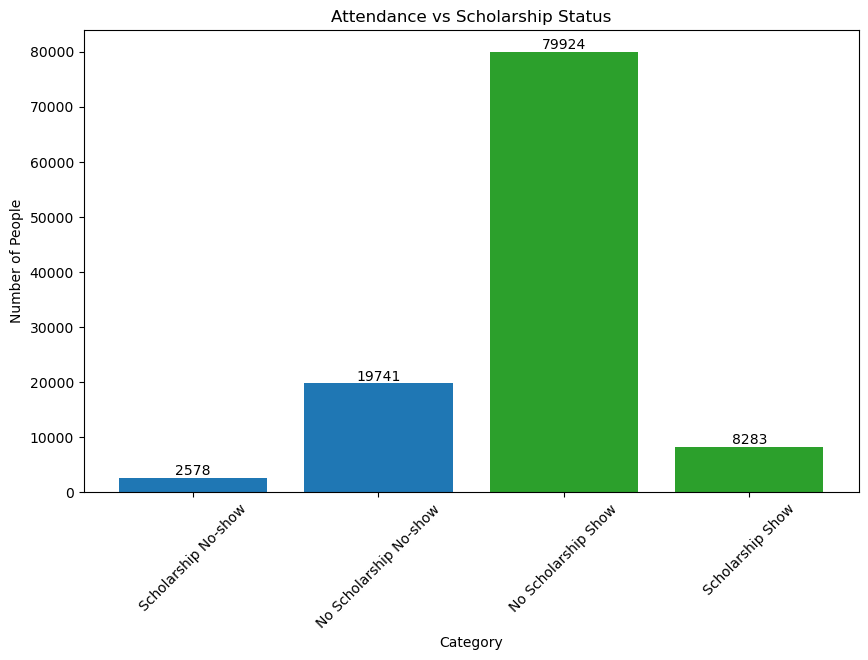

In [54]:


categories = ['Scholarship No-show', 'No Scholarship No-show', 'No Scholarship Show', 'Scholarship Show']
values = [number_of_people_with_scholarship_no_show, number_of_people_no_scholarship_no_show, number_of_people_no_scholarship_show, number_of_people_has_scholarship_show]

colors = ['#1f77b4', '#1f77b4', '#2ca02c', '#2ca02c']  # Example colors in hex format

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors)
plt.title('Attendance vs Scholarship Status')
plt.xlabel('Category')
plt.ylabel('Number of People')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.show()


### Attendance vs Scholarship Status
From these numbers, we can infer:

Higher Show Rates for Both Groups: Both groups, those with scholarships and those without, have higher rates of showing up than not showing up. This is evident from the numbers: 79,924 showed up without scholarships versus 19,741 who did not; 8,283 showed up with scholarships versus 2,578 who did not.

No Scholarship Group is Larger: The group without scholarships is significantly larger than the group with scholarships. This is noticeable both in the show and no-show categories. The no-scholarship group has a total of 99,665 people (19,741 no-shows and 79,924 shows) compared to the scholarship group's total of 10,861 people (2,578 no-shows and 8,283 shows).


### Conclusion: 
People without scholarships have a slightly higher rate of attending their appointments compared to those with scholarships. However, both groups have a reasonably high attendance rate, above 75%. The large difference in total numbers between the groups indicates that the scholarship program might be selective or available to a smaller portion of the population.

## Research Question 3
### How does the presence of hypertension affect appointment attendance behavior in patients?

In [55]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
# Define a mask to filter patients who showed up for their appointments
show = df['No-show'] == "No"  # 'No' in the 'No-show' column means the patient showed up

# Apply the mask to the DataFrame to filter only the rows where patients showed up
# and then use .shape[0] to get the count of these rows
total_showed_up = df[show].shape[0]

# Print the total number of patients who showed up for their appointments
print(f"Total number of patients who showed up: {total_showed_up}")


Total number of patients who showed up: 88207


In [57]:
# Define a mask to filter patients who did not show up for their appointments
no_show = df['No-show'] == "Yes"  # 'Yes' in the 'No-show' column means the patient did not show up

# Apply the mask to the DataFrame to filter only the rows where patients did not show up
# and then use .shape[0] to get the count of these rows
total_no_show = df[no_show].shape[0]

# Print the total number of patients who did not show up for their appointments
print(f"Total number of patients who did not show up: {total_no_show}")


Total number of patients who did not show up: 22319


In [58]:
# Define a mask to filter patients who have hypertension
have_hipertension = df.Hipertension == 1  # '1' indicates the patient has hypertension

# Apply the mask to the DataFrame to select only the rows where patients have hypertension
# and then use .shape[0] to get the count of these rows
total_have_hipertension = df[have_hipertension].shape[0]

# Print the total number of patients who have hypertension
print(f"Total number of patients with hypertension: {total_have_hipertension}")


Total number of patients with hypertension: 21801


In [59]:
# Define a mask to filter patients who do not have hypertension
no_hipertension = df['Hipertension'] == 0  # '0' indicates the patient does not have hypertension

# Apply the mask to the DataFrame to select only the rows where patients do not have hypertension
# and then use .shape[0] to get the count of these rows
total_no_hipertension = df[no_hipertension].shape[0]

# Print the total number of patients who do not have hypertension
print(f"Total number of patients without hypertension: {total_no_hipertension}")


Total number of patients without hypertension: 88725


In [60]:
# Ensure that conditions are wrapped in parentheses when combining them with '&'
# Define a mask for patients who showed up for their appointment
show = df['No-show'] == "No"  # 'No' means the patient showed up

# Define a mask for patients who have hypertension
have_hipertension = df['Hipertension'] == 1  # '1' indicates the patient has hypertension

# Combine the two masks to filter patients who have hypertension and showed up for their appointment
# Use '&' for a bitwise 'and' operation, ensuring each condition is enclosed in parentheses
hipertension_show_up = df[show & have_hipertension]

# Get the count of patients who have hypertension and showed up by accessing the shape attribute for the number of rows
total_hipertension_show_up = hipertension_show_up.shape[0]

# Print the total number of patients with hypertension who showed up for their appointments
print(f"Total number of patients with hypertension who showed up: {total_hipertension_show_up}")



Total number of patients with hypertension who showed up: 18029


In [61]:
# Define a mask for patients who showed up for their appointment
show = df['No-show'] == "No"  # 'No' in the 'No-show' column means the patient showed up

# Define a mask for patients who do not have hypertension
no_hipertension = df['Hipertension'] == 0  # '0' indicates the patient does not have hypertension

# Combine the two masks using a bitwise AND ('&') operation to filter patients
# who do not have hypertension and also showed up for their appointments.
# Each condition (mask) is enclosed in parentheses to ensure proper evaluation.
no_hipertension_show_up = df[show & no_hipertension]

# Calculate the number of patients who meet the criteria (do not have hypertension and showed up)
# by accessing the shape attribute for the number of rows in the filtered DataFrame
total_no_hipertension_show_up = no_hipertension_show_up.shape[0]

# Print the total number of patients without hypertension who showed up for their appointments
print(f"Total number of patients without hypertension who showed up: {total_no_hipertension_show_up}")



Total number of patients without hypertension who showed up: 70178


In [62]:
# Define a mask for patients who did not show up for their appointment
no_show = df['No-show'] == "Yes"  # 'Yes' in the 'No-show' column means the patient did not show up

# Define a mask for patients who have hypertension
have_hipertension = df['Hipertension'] == 1  # '1' indicates the patient has hypertension

# Combine the two masks using a bitwise AND ('&') operation to filter patients
# who have hypertension and also did not show up for their appointments.
# It's important to enclose each condition (mask) in parentheses to ensure proper evaluation.
hipertension_no_show = df[no_show & have_hipertension]

# Calculate the number of patients who meet the criteria (have hypertension and did not show up)
# by accessing the shape attribute for the number of rows in the filtered DataFrame
total_hipertension_no_show = hipertension_no_show.shape[0]

# Print the total number of patients with hypertension who did not show up for their appointments
print(f"Total number of patients with hypertension who did not show up: {total_hipertension_no_show}")


Total number of patients with hypertension who did not show up: 3772


In [63]:
# Define a mask for patients who did not show up for their appointment
no_show = df['No-show'] == "Yes"  # 'Yes' in the 'No-show' column means the patient did not show up

# Define a mask for patients who do not have hypertension
no_hipertension = df['Hipertension'] == 0  # '0' indicates the patient does not have hypertension

# Combine the two masks using a bitwise AND ('&') operation to filter patients
# who do not have hypertension and also did not show up for their appointments.
# Each condition (mask) is enclosed in parentheses to ensure proper evaluation.
no_hipertension_no_show = df[no_show & no_hipertension]

# Calculate the number of patients who meet the criteria (do not have hypertension and did not show up)
# by accessing the shape attribute for the number of rows in the filtered DataFrame
total_no_hipertension_no_show = no_hipertension_no_show.shape[0]

# Print the total number of patients without hypertension who did not show up for their appointments
print(f"Total number of patients without hypertension who did not show up: {total_no_hipertension_no_show}")


Total number of patients without hypertension who did not show up: 18547


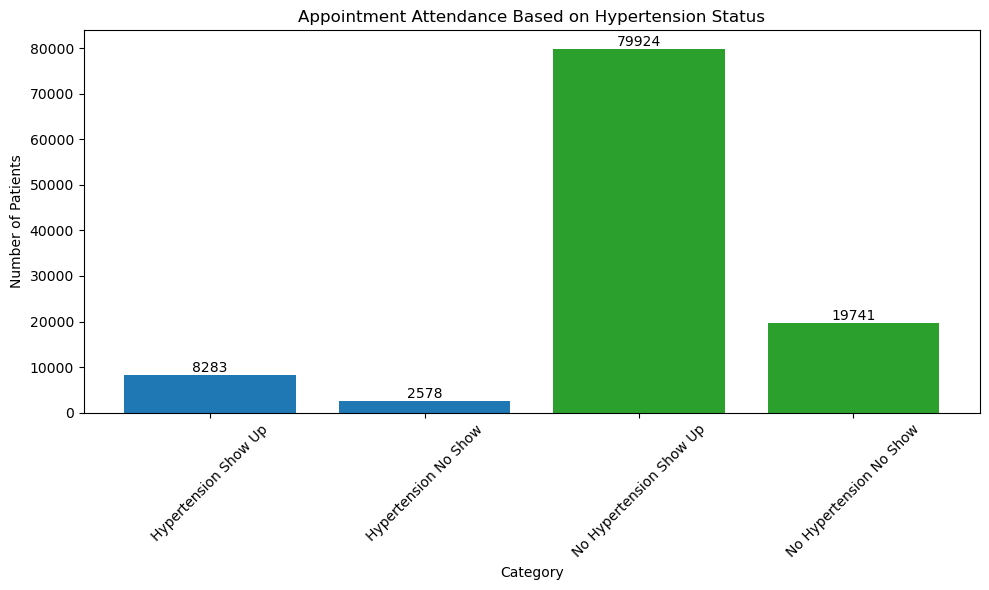

In [64]:


# Sample data for the number of patients in each category
total_hipertension_show_up = 8283
total_hipertension_no_show = 2578
total_no_hipertension_show_up = 79924
total_no_hipertension_no_show = 19741

# Categories for the bar graph
categories = ['Hypertension Show Up', 'Hypertension No Show', 'No Hypertension Show Up', 'No Hypertension No Show']

# Values corresponding to each category
values = [total_hipertension_show_up, total_hipertension_no_show, total_no_hipertension_show_up, total_no_hipertension_no_show]

# Creating the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['#1f77b4', '#1f77b4', '#2ca02c', '#2ca02c'])

# Adding title and labels
plt.title('Appointment Attendance Based on Hypertension Status')
plt.xlabel('Category')
plt.ylabel('Number of Patients')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the bar graph
plt.tight_layout()
plt.show()


The bar graph visualizing appointment attendance based on hypertension status reveals several key findings:

### Higher Attendance Among Patients Without Hypertension:
The largest group of patients who showed up for their appointments does not have hypertension (79,924 patients), indicating that within this dataset, patients without hypertension are more likely to attend their appointments compared to those with hypertension.

### Lower No-Show Rates for Patients Without Hypertension:
Similarly, the number of no-shows is higher among patients without hypertension (19,741) compared to those with hypertension (2,578), but this needs to be interpreted in the context of the total number of patients in each group. The absolute numbers suggest that, overall, patients without hypertension both show up and do not show up in greater numbers, likely reflecting a larger population of patients without hypertension.

### Significant Attendance Among Patients With Hypertension:
There's a substantial number of patients with hypertension who attended their appointments (8,283). This indicates that while patients with hypertension may face more health challenges, a significant number still manage to attend their healthcare appointments.

### Comparatively Lower No-Show Among Patients With Hypertension:
The number of patients with hypertension who did not show up for their appointments (2,578) is the smallest group. This could suggest that patients with hypertension, who likely have more pressing healthcare needs, may have a higher awareness or commitment to attending their appointments compared to no-shows in other categories.

### Overall Insights:

The data suggests that while patients without hypertension make up the bulk of both show and no-show appointments, a significant portion of patients with hypertension diligently attend their appointments.
The proportion of no-shows to shows within the hypertension group versus the non-hypertension group might offer insights into different health behavior patterns, possibly driven by the seriousness of their health conditions or the level of healthcare engagement.
These findings could be used to tailor appointment reminder systems, support services, or interventions aimed at increasing appointment attendance rates, especially for patients with chronic conditions like hypertension.
It's important to consider these findings in the context of the overall population and healthcare engagement strategies. Further analysis could delve into the reasons behind no-shows and explore other factors such as age, gender, socioeconomic status, and distance from healthcare facilities to gain a more nuanced understanding of appointment attendance behaviors.







<a id='conclusions'></a>
## Conclusions

The exploratory analysis provided insights into how certain factors, like the presence of hypertension, might influence patient attendance at healthcare appointments. However, without detailed statistical analysis and consideration of a broader range of influencing factors, the findings remain observational. Future analyses could benefit from a more comprehensive approach, incorporating multivariate analysis and statistical testing, to draw more robust conclusions about what influences patient appointment attendance behavior.

